# Image classification - MNIST dataset
  
In this notebook I train a CNN for the MNIST dataset.  
MNIST dataset contains handwritten digits between 0 to 9. 
We use sequencial model to predict wich digit is written. 
Also, we use the diferent models we created to inference results in test images of our own. This allow us check the model in real data. 

https://www.kaggle.com/code/amyjang/tensorflow-mnist-cnn-tutorial

## Import libraries  
  
First of all, we import neccesary libraries.

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import expand_dims

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing import image

In [2]:
print(tf.__version__)

2.17.0


## Import data  
  
Data is imported from TensorFlow datasets.  
This is a easy way to load data because the dataset is already divided from origin. 

In [3]:
# instance mist from keras and declare train and test datasets
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Printing the shape of dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
# Check the color values 
print(x_train.max())
print(x_train.min())

255
0


We are going to check how the clases are divided in train dataset.  
We do this to check the balance level of the dataset.  
How we can see, the dataset is well-balanced. 

<Axes: ylabel='Count'>

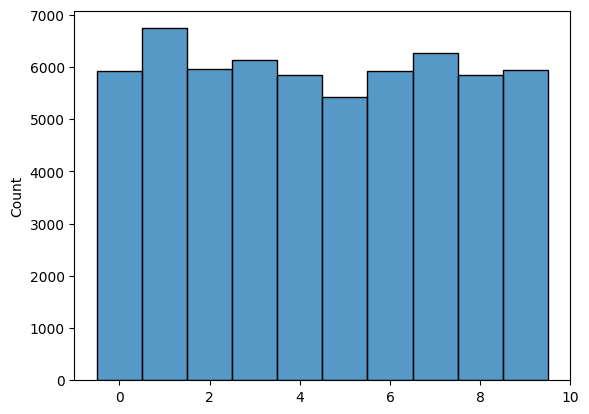

In [6]:
sns.histplot(y_train, discrete=True, kde=False)

## Data preprocessing  
  
data preprocessing is the most important step in machine learning.  
In this step we normalize the values between [0-1] to increase the performance of the model.  
We also use one hot encoding to the categorical labels. 

In [7]:
# Change the value range to [0, 1]
x_train, x_te = x_train / 255.0, x_test / 255.0

# one hot encoding to increase the performance
y_train = to_categorical(y_train, num_classes=10) 
y_te = to_categorical(y_test, num_classes=10)

In [8]:
# data particion betweet train and validation
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42) 

In [9]:
# Expand dimensions 
print(x_tr.shape)
x_tr = expand_dims(x_tr, axis=3)
x_val = expand_dims(x_val, axis=3)
x_te = expand_dims(x_te, axis=3)
print(x_tr.shape)

(54000, 28, 28)
(54000, 28, 28, 1)


Now we can see some examples of image data and the label

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


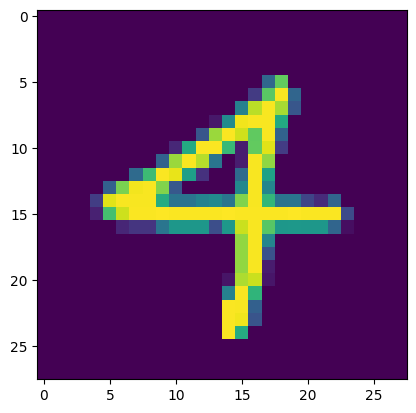

In [11]:
plt.imshow(x_tr[72][:,:,0])
print(y_tr[72])

## CNN topology

In [46]:
def trainning_evaluating_cnn(cnn, x_tr, y_tr, x_val, y_val, x_te, y_te, epochs:int, batch_size:int):
    H = cnn.fit(x_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()

    predictions = cnn.predict(x_te, batch_size=batch_size)
    print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1)))

    # PRINT CONFUSION MATRIX
    predictions_classes = np.argmax(predictions, axis=1)
    y_true = np.argmax(y_te, axis=1)

    # Compute the confusion matrix
    confusion_mtx = tf.math.confusion_matrix(y_true, predictions_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return cnn

### First model 

In [10]:
# We use sequential API
cnn = Sequential()

# BASE MODEL
cnn.add(layers.Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
cnn.add(layers.MaxPooling2D((2,2)))

cnn.add(layers.Conv2D(64,(3,3),activation='relu'))
cnn.add(layers.MaxPooling2D((2,2)))

cnn.add(layers.Conv2D(64,(3,3),activation='relu'))

# TOP MODEL
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64,activation='relu'))
cnn.add(layers.Dense(10,activation='softmax'))

cnn.summary()

/opt/anaconda3/envs/data-env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
cnn.compile(optimizer='adam',
               #loss='sparse_categorical_crossentropy',
               loss='categorical_crossentropy', # Si las etiquetas están en one-hot encoded
               metrics=['accuracy'])

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9989 - loss: 0.0035 - val_accuracy: 0.9993 - val_loss: 0.0021
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9995 - loss: 0.0016 - val_accuracy: 0.9998 - val_loss: 6.4716e-04
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9994 - loss: 0.0013 - val_accuracy: 0.9998 - val_loss: 7.4908e-04
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9999 - loss: 5.8429e-04 - val_accuracy: 1.0000 - val_loss: 2.4291e-04
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 7.1436e-05


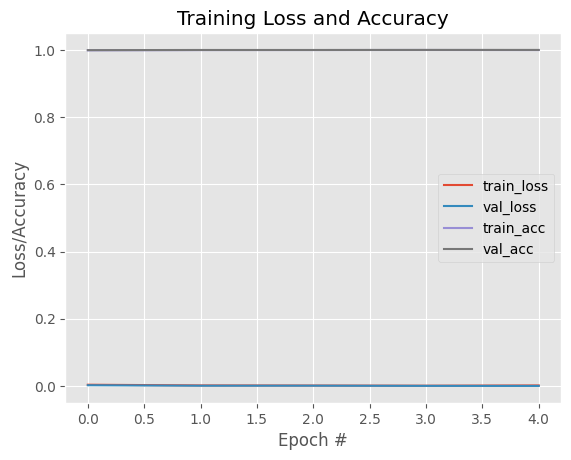

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



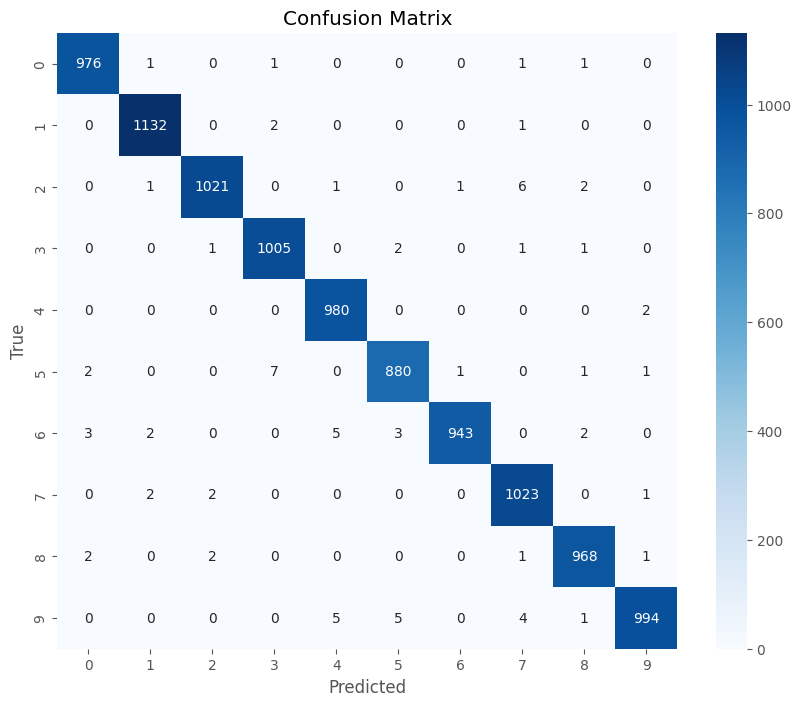

In [47]:
cnn = trainning_evaluating_cnn(cnn, x_train, y_train, x_val, y_val, x_te, y_te, epochs=5, batch_size=256)

### Second model

In [42]:
# Now we try to simplify the model

model = Sequential()

# BASE MODEL
model.add(layers.Conv2D(16,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32,(3,3),activation='relu'))

# TOP MODEL
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,626 (92.29 KB)

 Trainable params: 23,626 (92.29 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='adam',
               #loss='sparse_categorical_crossentropy',
               loss='categorical_crossentropy', # Si las etiquetas están en one-hot encoded
               metrics=['accuracy'])

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9756 - loss: 0.0771 - val_accuracy: 0.9895 - val_loss: 0.0399
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9805 - loss: 0.0619 - val_accuracy: 0.9897 - val_loss: 0.0365
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9807 - loss: 0.0610 - val_accuracy: 0.9900 - val_loss: 0.0357
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9823 - loss: 0.0568 - val_accuracy: 0.9923 - val_loss: 0.0304
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9832 - loss: 0.0542 - val_accuracy: 0.9917 - val_loss: 0.0282


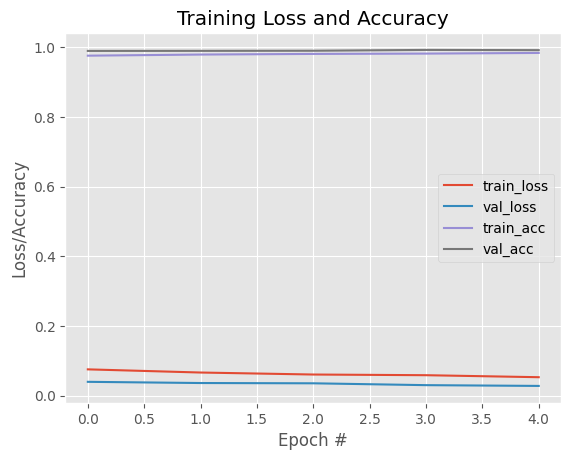

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



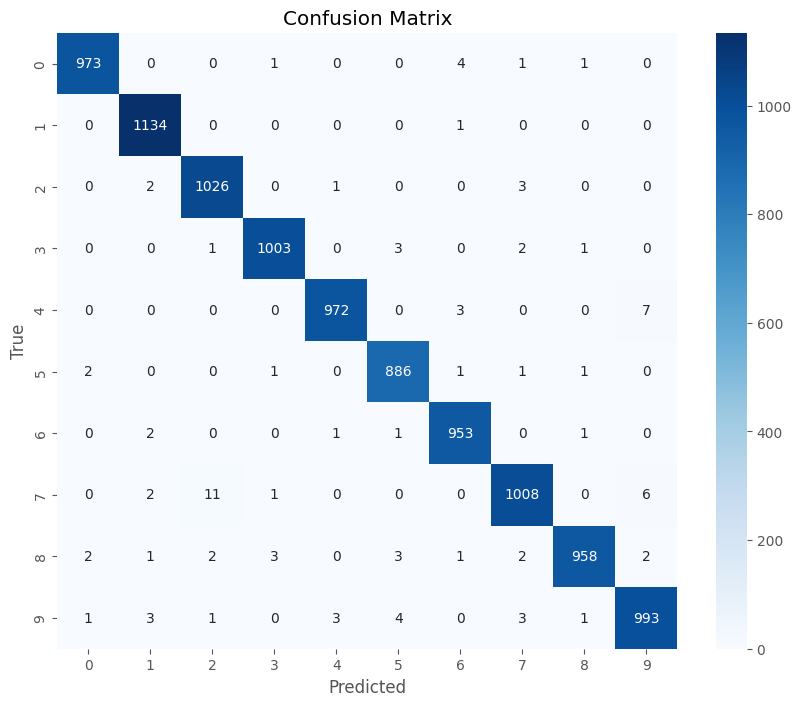

In [48]:
model = trainning_evaluating_cnn(model, x_train, y_train, x_val, y_val, x_te, y_te, epochs=5, batch_size=256)

## Inference 

In [63]:
# Definir la función preprocess_images
def preprocess_new_images(image_folder, target_size=(28, 28)):
    images = []
    for img_name in os.listdir(image_folder):
        img_path = os.path.join(image_folder, img_name)
        img = image.load_img(img_path, target_size=target_size, color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array = img_array.astype('float32') / 255.0  # Normalizar
        images.append(img_array)
    return np.array(images).reshape(-1, 28, 28, 1)

In [ ]:
def make_predictions(model, path:str):
    images = preprocess_new_images(path)

    predictions = model.predict(images)

    predictions_classes = np.argmax(predictions, axis=1)

    # Mostrar las imágenes con sus predicciones
    plt.figure(figsize=(10, 10))
    for i in range(min(10, len(processed_images))):
        plt.subplot(1, 10, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(processed_images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(f'Pred: {predictions_classes[i]}')
    plt.show()

In [64]:
# Preprocesar las imágenes
image_folder = './test_images/jpeg'
processed_images = preprocess_new_images(image_folder)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


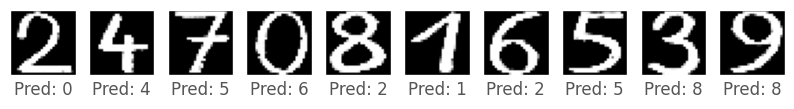

In [65]:
predictions = model.predict(processed_images)

# Convertir las predicciones a etiquetas de clase
predicted_classes = np.argmax(predictions, axis=1)

# Mostrar las imágenes con sus predicciones
plt.figure(figsize=(10, 10))
for i in range(min(10, len(processed_images))):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(processed_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f'Pred: {predicted_classes[i]}')
plt.show()